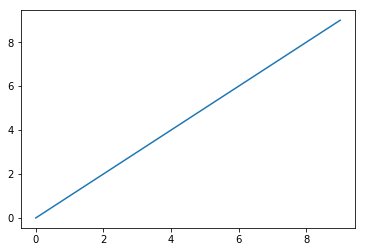

In [6]:
#Matplotlib
#파이썬에서 데이터과학 관련 시각화 패키지
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# %matplotlib inline #주피터노트북에서 show() 호출없이도
                     #그래프를 그릴 수 있게 해줌
data = np.arange(10)
plt.plot(data)
# plt.show()

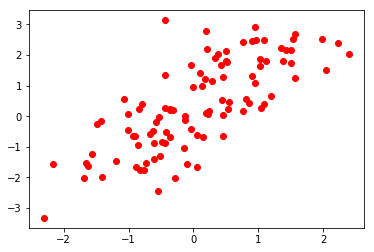

In [5]:

#산점도 - 100%의 표준정규분포 난수 생성
list = []
for i in range(100):              #0~99
    x = np.random.normal(0,1)     #표준정규분포 난수
    y = x + 0.1 + 0.2 + np.random.normal(0,1)
    list.append([x, y])

x_data = [v[0] for v in list]   #v = [x,]
y_data = [v[1] for v in list]   #v = [,y]

plt.plot(x_data,y_data,'ro')
# plt.show()

Ttest_indResult(statistic=0.319960228209846, pvalue=0.755583336185639)
국어 Ttest_indResult(statistic=-2.490140665442242, pvalue=0.031982494983816424)
영어 Ttest_indResult(statistic=-0.6156907152631581, pvalue=0.5518533781528807)
수학 Ttest_indResult(statistic=1.4961318778859336, pvalue=0.1654958420079056)
과학 Ttest_indResult(statistic=4.328442555331755, pvalue=0.0014931977711732465)


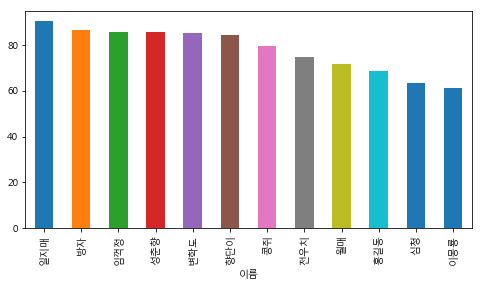

In [11]:
df = pd.read_excel('c:/Java/sungjuk.xlsx')

subj = ['국어', '영어', '수학', '과학']
df['총점'] = df[subj].sum(axis=1)
df['평균'] = df['총점'] / len(subj)
df.sort_values(['평균'], ascending=[False]) #평균으로 정렬

import matplotlib as mpl
# font_name = mpl.font_manager.FontProperties(fname='c:/windows/fonts/malgun.ttf').get_name()
# mpl.rc('font',family=font_name)
mpl.rc('font',family='Malgun Gothic')
sj = df.sort_values(['평균'],ascending=[False])
sj.index = sj['이름']
sj['평균'].plot(kind='bar',figsize=(8,4))


79.04166666666667 77.125
Ttest_indResult(statistic=0.319960228209846, pvalue=0.755583336185639)
국어 Ttest_indResult(statistic=-2.490140665442242, pvalue=0.031982494983816424)
영어 Ttest_indResult(statistic=-0.6156907152631581, pvalue=0.5518533781528807)
수학 Ttest_indResult(statistic=1.4961318778859336, pvalue=0.1654958420079056)
과학 Ttest_indResult(statistic=4.328442555331755, pvalue=0.0014931977711732465)


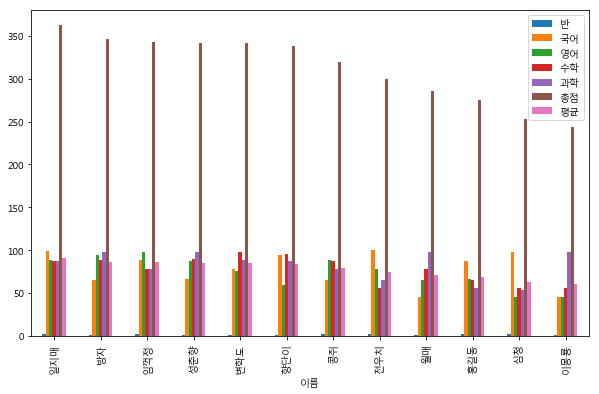

In [12]:
#성적 비교 - 어느 반이 잘했나?
ban1 = df[df['반'] == 1]
ban2 = df[df['반'] == 2]
ban1_mean = ban1['총점'].sum() / (6*4)
ban2_mean = ban2['총점'].sum() / (6*4)
print(ban1_mean, ban2_mean)  #79.042 vs 77.13

#두 집단 간의 평균은 유의미하게 차이 나는 것인가?(t검증)
#p-value 값이 0.005 이하일 때 - 차이가 난다고 할 수 있음

import scipy.stats as stats
result = stats.ttest_ind(ban1['평균'], ban2['평균'])
print(result)  #pvalue=0.755583336185639

#그럼, 과목별 평균은 차이가 나는가?(t검증)
for sub in subj:
    print(sub, stats.ttest_ind(ban1[sub], ban2[sub]))
# 국어 Ttest_indResult(statistic=-2.490140665442242, pvalue=0.031982494983816424)
# 영어 Ttest_indResult(statistic=-0.6156907152631581, pvalue=0.5518533781528807)
# 수학 Ttest_indResult(statistic=1.4961318778859336, pvalue=0.1654958420079056)
# 과학 Ttest_indResult(statistic=4.328442555331755, pvalue=0.0014931977711732465)

#전체 성적데이터에 대한 그래프 출력
sj.plot(kind='bar', figsize=(10,6))

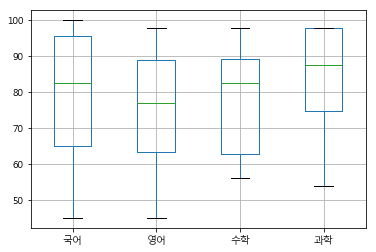

In [10]:
#과목별 점수 분포 - 박스수염 그래프 작성
df[subj].boxplot(return_type='axes')

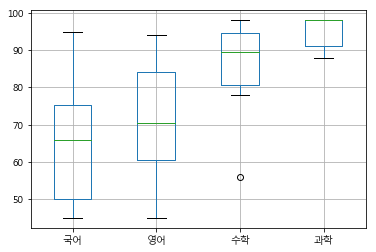

In [14]:
#1반, 2반 과목별 점수 분포
ban1[subj].boxplot(return_type='axes') #일반


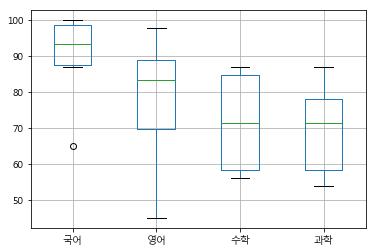

In [15]:
ban2[subj].boxplot(return_type='axes') #일반

(0.5632890597067751, 0.05650580486155532)


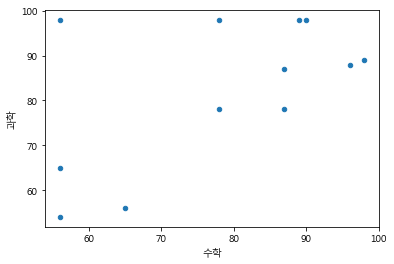

In [18]:
#과목별 상관관계 - '수학:과학'와 '국어:영어'
df.plot(kind='scatter', x='수학', y='과학')
print(stats.pearsonr(df['수학'],df['과학'])) 

(0.10566562777973997, 0.7437959551857836)


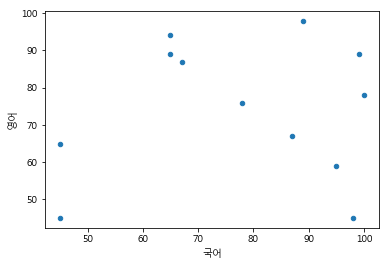

In [19]:
df.plot(kind='scatter', x='국어', y='영어')
print(stats.pearsonr(df['국어'],df['영어']))